In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib as mpl
import seaborn as sns
from cmcrameri import cm

mpl.rcParams['lines.markersize']=10
mpl.rcParams['axes.titlesize']=30
mpl.rcParams['legend.fontsize']=20
mpl.rcParams['xtick.labelsize']=15
mpl.rcParams['ytick.labelsize']=15
mpl.rcParams['axes.labelsize']=20

In [2]:
dt=0.05   
dt_solver=0.01
model_dim=40
num_clv=40
model_name='L96'
seed_num=3

spr=1
t_start=0
t_stop=4000

In [3]:
initial_=np.load('/home/shashank/Documents/Data Assimilation/ENKF_for_CLVs/data/L96/L96-{}/seed_{}/Initial_condition_on_att.npy'.format(model_dim,seed_num))
initial_

array([ 3.09967058,  0.45574977,  1.26814639,  7.25534782, -4.08970314,
       -3.4719955 , -4.47966309,  4.25712317,  5.06007492, -2.90044291,
        4.95560722,  4.00361651,  2.47259243,  8.86833013,  1.58844777,
        0.45600673,  5.06021293,  6.84167322, -1.21351426,  4.49545988,
        2.47994781,  2.27135901,  3.13000406,  4.4123365 , -1.45111354,
       -2.28643986,  1.37091446,  7.23344249,  4.79818179, -1.32598263,
       -2.77050121,  1.57520976,  9.6583376 , -1.90940488,  2.54720387,
        3.39515052,  6.69496766,  4.38754897, -5.32599873,  1.41983909])

In [4]:
data_path='/home/shashank/Documents/Data Assimilation/ENKF_for_CLVs/data/L96/L96-{}/seed_{}'.format(model_dim,seed_num)
start_idx=0
base_type='state_noisy'
os.chdir(data_path+'/sigma={}'.format(0.0))
base_traj=np.load('{}_g={}_sigma={}.npy'.format(base_type,dt,0.0))[start_idx:]
C=np.load('matrices_c_{}_model_{}_{}.npy'.format(model_dim,model_name,base_type))[t_start:t_stop]
G=np.load('matrices_g_{}_model_{}_{}.npy'.format(model_dim,model_name,base_type))[t_start:t_stop]

print(C.shape)
print(G.shape)
V=np.zeros_like(G)
for i in range(G.shape[0]):
    V[i]=G[i]@C[i] 

(4000, 40, 40)
(4000, 40, 40)


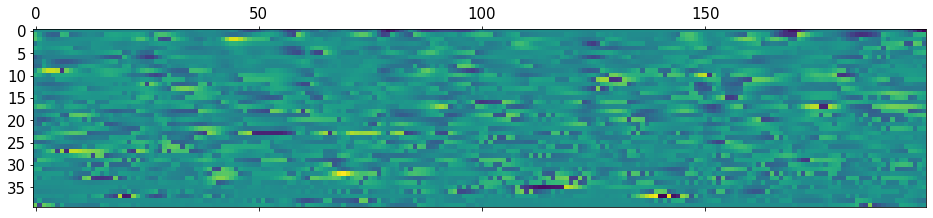

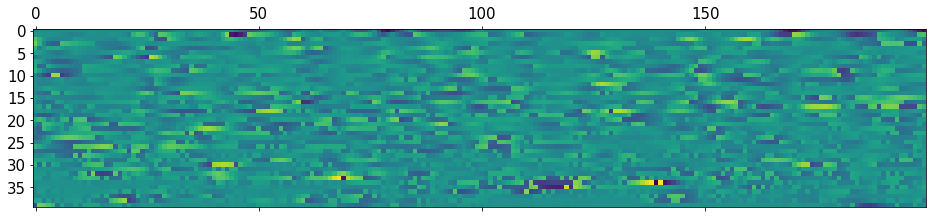

In [8]:
plt.matshow(G[0:200,0].T)
plt.matshow(G1[:200,0].T)

In [9]:
mu=0.1
data_path='/home/shashank/Documents/Data Assimilation/ENKF_for_CLVs/data/L96/L96-40/assimilated_trajs_seed_3'
folder_name='ebias=4.0_ecov=2.0_obs=20_ens=20_mu={}_gap=0.05_alpha=1.0_loc=gaspri_r=4'.format(mu)
os.chdir(data_path+'/ob{}'.format(4)) 
os.chdir(folder_name)
#os.chdir(data_path+'/mu={}_times_I20'.format(mu))
base_type='Analysis'
C1=np.load('matrices_c_{}_model_{}_{}.npy'.format(model_dim,model_name,base_type))
G1=np.load('matrices_g_{}_model_{}_{}.npy'.format(model_dim,model_name,base_type))
V1=np.zeros_like(G1)
for i in range(G1.shape[0]):
    V1[i]=G1[i]@C1[i]


print(C1.shape)
print(G1.shape)
#print(noisy_traj.shape)

(4000, 40, 40)
(4000, 40, 40)


In [66]:
# Looking for nearby projections
norminf=np.zeros((G.shape[0],num_clv))
norminf_=np.zeros((G.shape[0],num_clv))
for i in range(G.shape[0]):
    for j in range(num_clv):
        norminf[i,j]=np.linalg.norm(G[i,:,j]-G1[i,:,j],np.inf)
        norminf_[i,j]=np.linalg.norm(G[i,:,j]-G1[i,:,j],-np.inf)

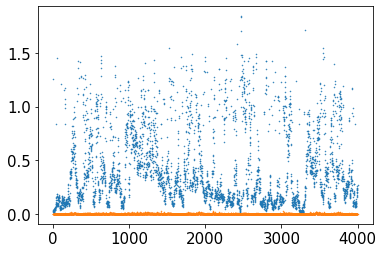

In [72]:
plt.plot(np.arange(norminf.shape[0]),norminf[:,0],'.',ms=1.0)
plt.plot(np.arange(norminf.shape[0]),norminf_[:,0],'.',ms=1.0)

In [22]:
# RMSE
print(np.sqrt(np.mean(np.sum((base_traj[t_start:t_stop]-noisy_traj[t_start:t_stop])**2,axis=1),axis=0)/model_dim))
print(sigma) # Analytical 

0.19956048069644197
0.2


## We now plot the noisy state clvs

In [27]:
## To check, average errors over the interval for which clv is calculated. And the cosine of the angle between them
cosines=np.zeros((G.shape[0],num_clv))
for i in range(G.shape[0]):
    for j in range(num_clv):
        cosines[i,j]=np.absolute(np.dot(G[i,:,j],G2[i,:,j]))

In [28]:
cosines2=np.zeros((G.shape[0],num_clv))
for i in range(G.shape[0]):
    for j in range(num_clv):
        cosines2[i,j]=np.absolute(np.dot(V[i,:,j],V2[i,:,j]))

Text(0.5, 1.0, 'CLV_40')

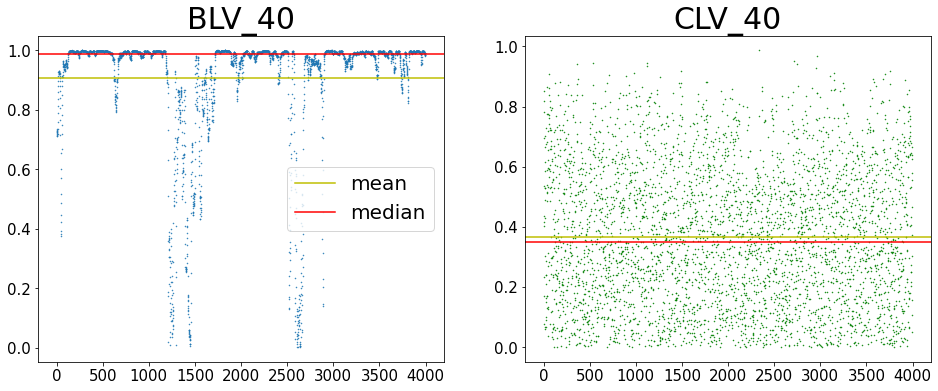

In [37]:
idx=39
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.plot(np.arange(cosines.shape[0]),cosines[:,idx],'.',ms=1.0)
plt.axhline(np.mean(cosines[:,idx]),label='mean',c='y')
plt.axhline(np.median(cosines[:,idx]),label='median',c='r')
plt.title('BLV_{}'.format(idx+1))
plt.legend()

plt.subplot(1,2,2)
plt.plot(np.arange(cosines2.shape[0]),cosines2[:,idx],'.',ms=1.0,c='g')
plt.axhline(np.mean(cosines2[:,idx]),c='y')
plt.axhline(np.median(cosines2[:,idx]),c='r')
plt.title('CLV_{}'.format(idx+1))


In [75]:
ct0 = (1.0 - np.abs(cosines[:,0])) < 0.1
ct1 = (1.0 - np.abs(cosines[:,1])) < 0.1
ct2 = (1.0 - np.abs(cosines[:,2])) < 0.1
ct3 = (1.0 - np.abs(cosines[:,3])) < 0.1
n0 = np.sum(ct0)/10000
n1 = np.sum(ct1)/10000
n2 = np.sum(ct2)/10000
n3 = np.sum(ct3)/10000
print(n0,n1,n2,n3)

0.9255 0.9126 0.9881 0.7885


In [46]:
# Statistics of the error over time
means=np.mean(cosines,axis=0)
variances=np.std(cosines,axis=0)

print(means[:5])
print(variances[:5])

[0.89267534 0.83196125 0.80729277 0.73631258 0.70961586]
[0.18522296 0.21097889 0.24836533 0.26518048 0.27416242]


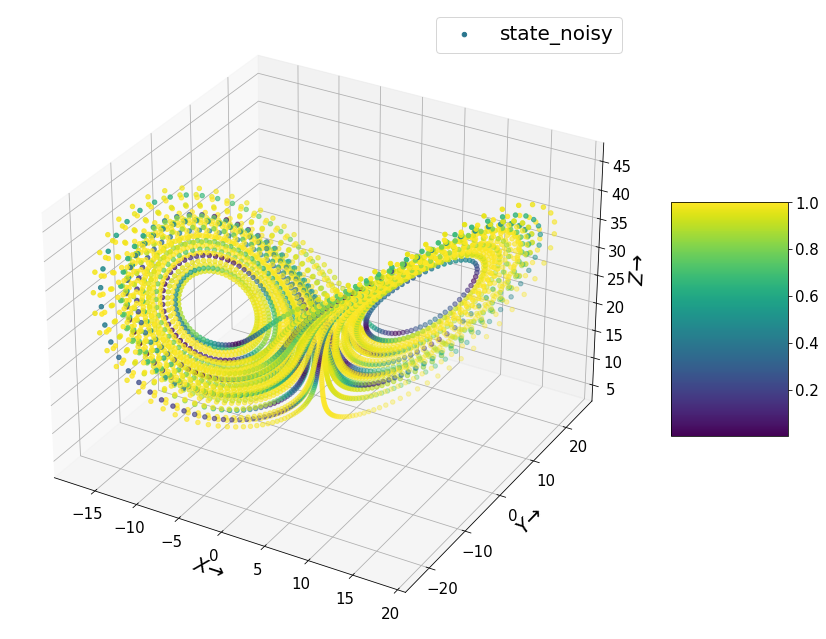

In [152]:
#plot the state and the trajectory
fig = plt.figure(figsize=(14,14))

# syntax for 3-D projection
ax = plt.axes(projection ='3d')
# plotting
my_scatter=ax.scatter(base_traj[:,0],base_traj[:,1],base_traj[:,2],c=cosines[:,0],label='{}'.format(base_type),cmap='viridis')
ax.set_xlabel(r'$X\to$')
ax.set_ylabel(r'$Y\to$')
ax.set_zlabel(r'$Z\to$')
fig.colorbar(my_scatter,shrink=0.5, aspect=2)
plt.legend()

In [ ]:
# Relative angle between clvs for L63 at different points in phase space

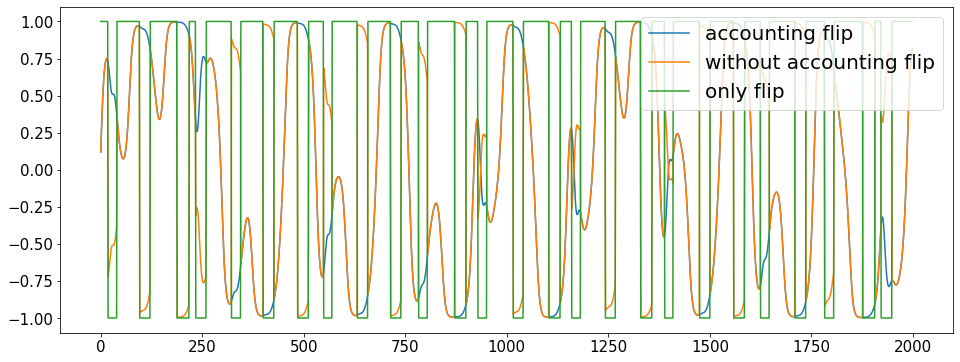

In [36]:
#  Looking at the variation of angles between clv 1 and 2 over time
plt.figure(figsize=(16,6))
plt.plot(np.arange(cosines_rel.shape[0])[t1:t2],C[t1:t2,0,1]*C[t1:t2,0,0],label='accounting flip')
plt.plot(np.arange(cosines_rel.shape[0])[t1:t2],C[t1:t2,0,1],label='without accounting flip')
plt.plot(np.arange(cosines_rel.shape[0])[t1:t2],C[t1:t2,0,0],label='only flip')
plt.legend(loc='upper right')


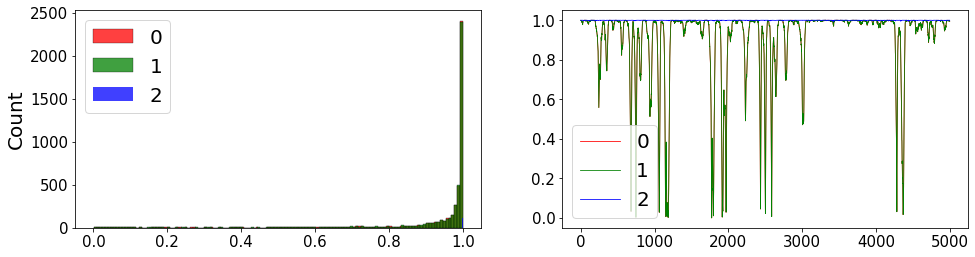

In [147]:
plt.figure(figsize=(16,4))
colors=['r','g','b']
plt.subplot(1,2,1)
for i in range(3):
    sns.histplot(x=cosines2[:,i],fill=True,color=colors[i],label='{}'.format(i))

plt.legend()
plt.subplot(1,2,2)
for i in range(3):
    plt.plot(np.arange(len(l2_error)),cosines2[:,i],label='{}'.format(i),lw=0.8,c=colors[i])
plt.legend()

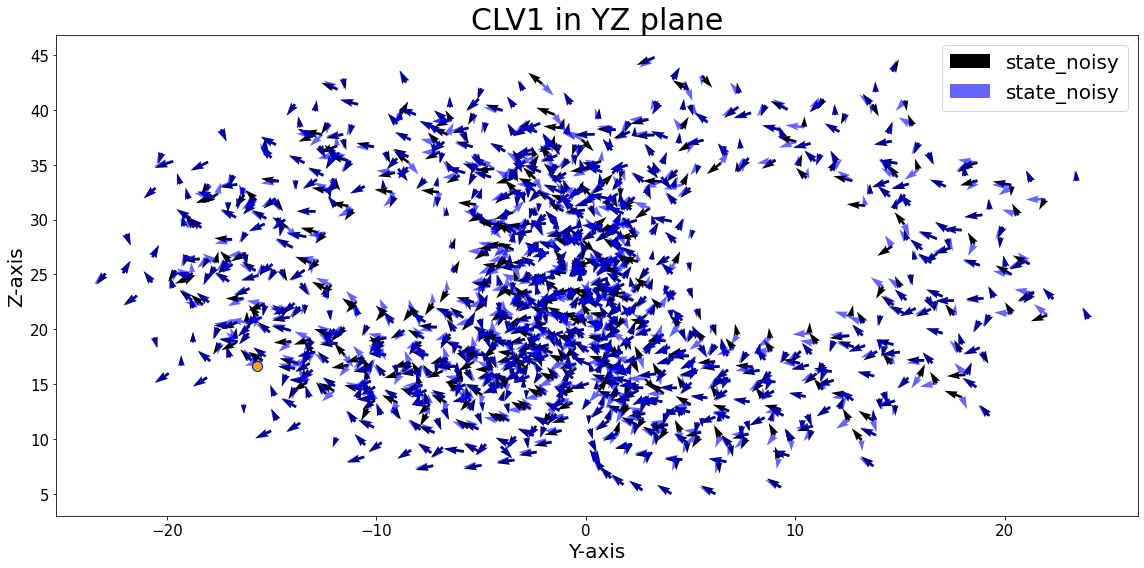

In [138]:
# Plot the two at same clv index
base_type1='state_noisy'
num_clv=1
spr=4
plot_pairs=[[1,2]]
for clv_index in range(num_clv):
    for l,m in plot_pairs:
        fig, ax = plt.subplots(figsize=(16,8))
        ax.quiver(base_traj[::spr,l],base_traj[::spr,m],G[::spr,l,clv_index],G[::spr,m,clv_index],scale_units='xy',scale=1.0,color='black',label='{}'.format(base_type))
        ax.quiver(base_traj[::spr,l],base_traj[::spr,m],G2[::spr,l,clv_index],G2[::spr,m,clv_index],scale_units='xy',scale=1.0,color='blue',label='{}'.format(base_type1),alpha=0.6)        
        ax.scatter(base_traj[0,l],base_traj[0,m],c='orange',s=100,edgecolors='blue')
        #ax.scatter(traj[0,l],traj1[0,m],c='r',s=80,edgecolors='black')
        ax.set_title('CLV{} in {}{} plane'.format(clv_index+1,coord[l],coord[m]))
        ax.set_xlabel('{}-axis'.format(coord[l]))
        ax.set_ylabel('{}-axis'.format(coord[m]))
        plt.legend()
        plt.tight_layout()

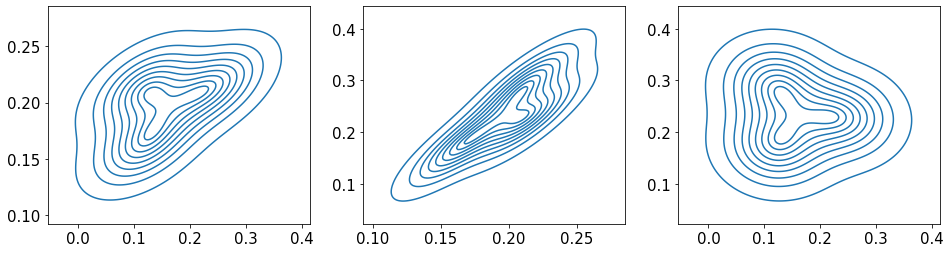

In [84]:
combs=[[0,1],[1,2],[0,2]]
fig=plt.subplots(1,3,figsize=(16,4))
for i,j in enumerate(combs):
    plt.subplot(1,3,i+1)
    sns.kdeplot(x=cosines_rel[j[0]],y=cosines_rel[j[1]])    

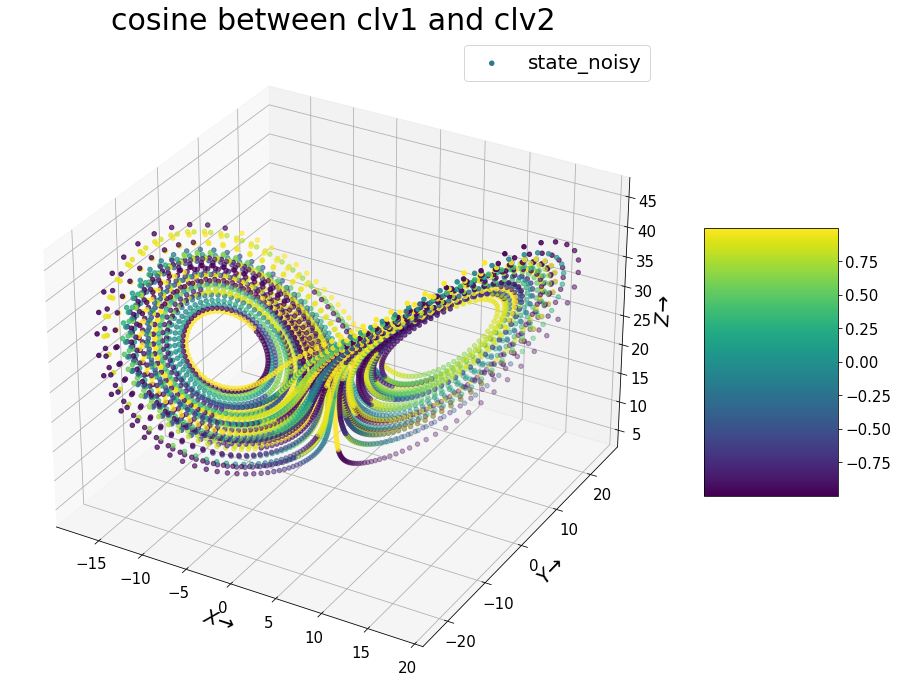

In [182]:
# If we can study the degree of homogeneity of these vectors on the phase space
fig = plt.figure(figsize=(16,12))
 
# syntax for 3-D projection
ax = plt.axes(projection ='3d')
# plotting
my_scatter=ax.scatter(base_traj[:,0],base_traj[:,1],base_traj[:,2],c=C2[:,0,1],label='{}'.format(base_type),cmap='viridis')
ax.set_xlabel(r'$X\to$')
ax.set_ylabel(r'$Y\to$')
ax.set_zlabel(r'$Z\to$')
ax.set_title('cosine between clv{} and clv{}'.format(1,2))
fig.colorbar(my_scatter,shrink=1.0, aspect=2)
plt.legend()

In [ ]:
# We must show something more,

In [115]:
a=np.arange(5)
a[-1]

4

IndexError: index 5 is out of bounds for axis 0 with size 5

In [143]:
e=np.load('/home/shashank/Documents/Data Assimilation/ENKF_for_CLVs/codes/clv_calculation/lexp_T=1000_dt=0.02.npy')

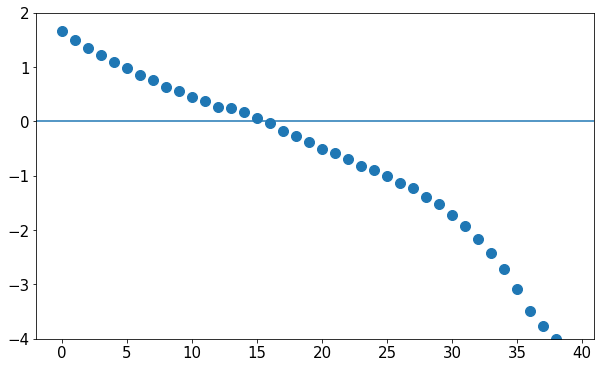

In [144]:
plt.figure(figsize=(10,6))
plt.scatter(np.arange(40),e)
plt.ylim(-4,2)
plt.axhline(0)

In [152]:
spectral_gap=e-np.roll(e,-1)

In [154]:
spectral_gap

array([ 0.17181993,  0.14183493,  0.13793721,  0.1238627 ,  0.10361722,
        0.13871518,  0.08624392,  0.12303347,  0.08177881,  0.11036354,
        0.07581547,  0.10503605,  0.02912842,  0.0647063 ,  0.10809056,
        0.08774396,  0.14695104,  0.09758746,  0.10927299,  0.12577198,
        0.07214951,  0.11593921,  0.12856404,  0.0797685 ,  0.11242957,
        0.11326056,  0.10920631,  0.16034173,  0.1274473 ,  0.19532448,
        0.20684524,  0.23153489,  0.2601153 ,  0.30701177,  0.36316436,
        0.40477486,  0.27040717,  0.24134447,  0.21937291, -5.88831331])